# Modelos de regresión lineal

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train.copy()

2. Haga un análisis exploratorio extenso de los datos. Explique bien todos los hallazgos. No
ponga solo gráficas y código. Debe llegar a conclusiones interesantes para poder predecir.
Explique el preprocesamiento que necesitó hacer

In [5]:
print(df.shape)

(1460, 81)


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

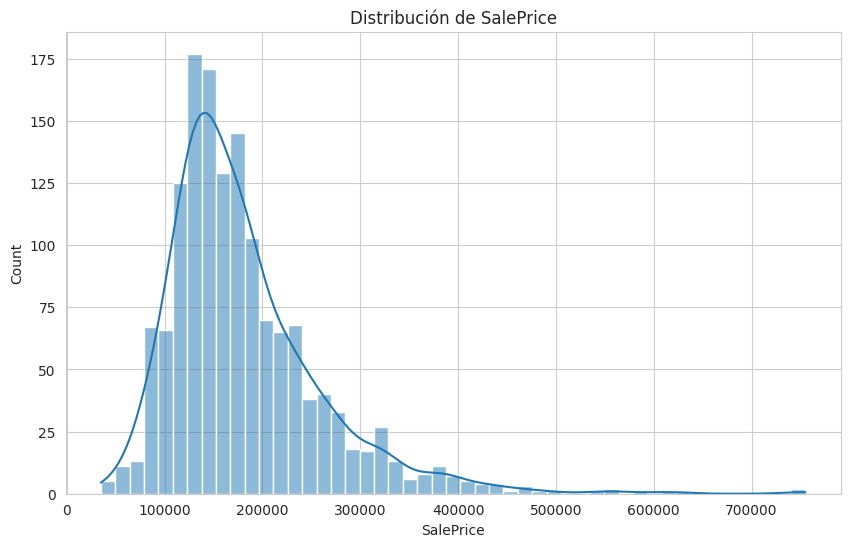

In [12]:
#Distribución de SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.show()

In [13]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


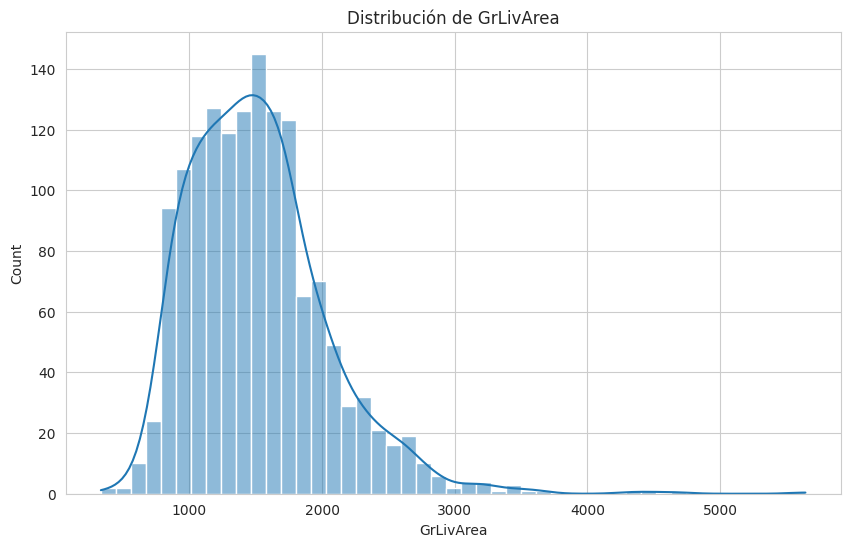

In [14]:
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribución de GrLivArea')
plt.show()

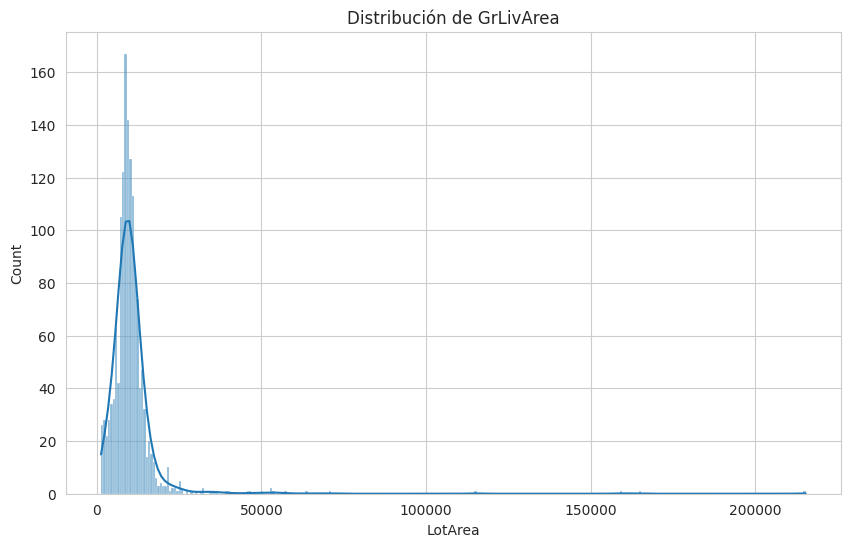

In [15]:
sns.histplot(df['LotArea'], kde=True)
plt.title('Distribución de LotArea')
plt.show()

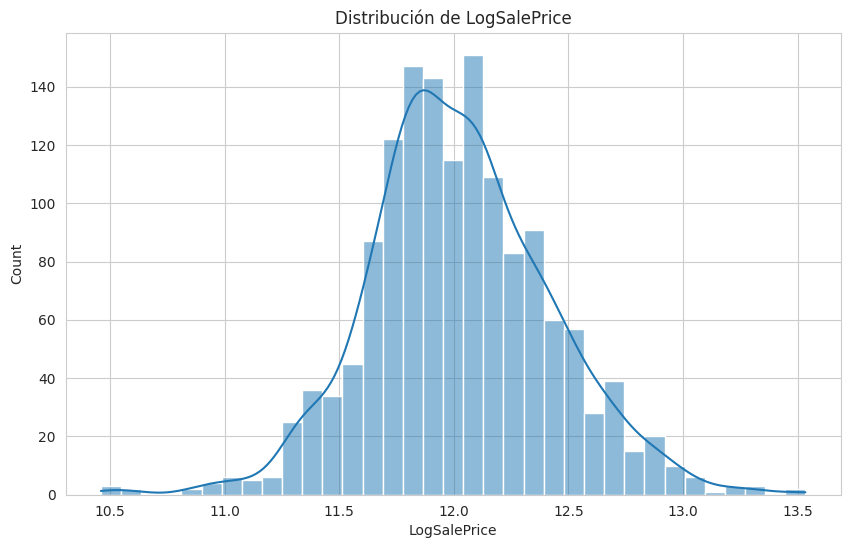

In [16]:
df['LogSalePrice'] = np.log(df['SalePrice'])
sns.histplot(df['LogSalePrice'], kde=True)
plt.title('Distribución de LogSalePrice')
plt.show()

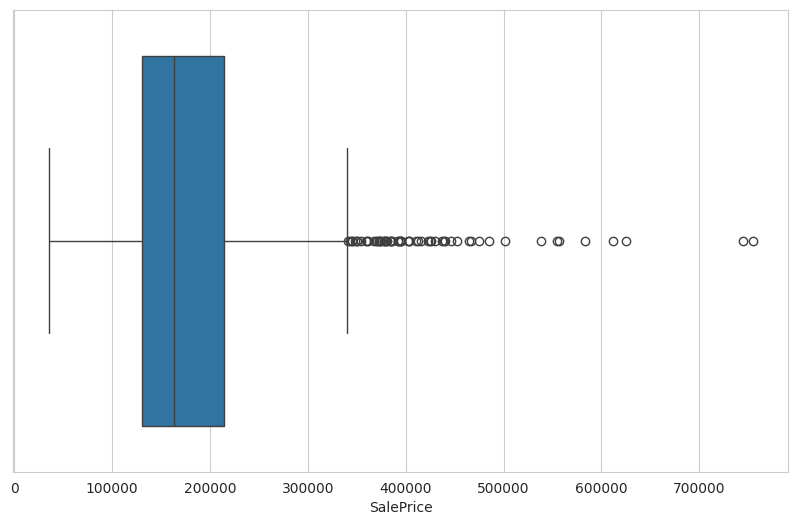

In [17]:
sns.boxplot(x=df['SalePrice'])
plt.show()

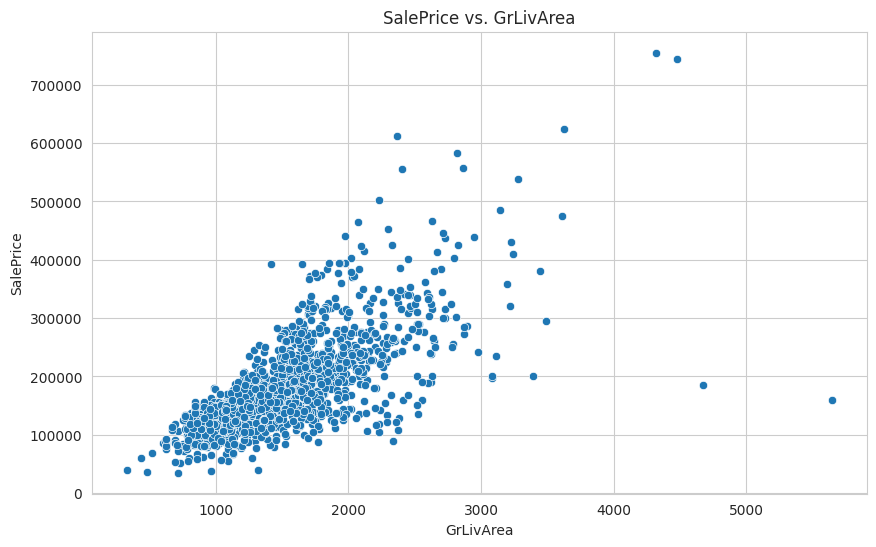

Correlación entre SalePrice y GrLivArea: 0.7086244776126523


In [20]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.show()

correl = df['SalePrice'].corr(df['GrLivArea'])
print(f"Correlación entre SalePrice y GrLivArea: {correl}")

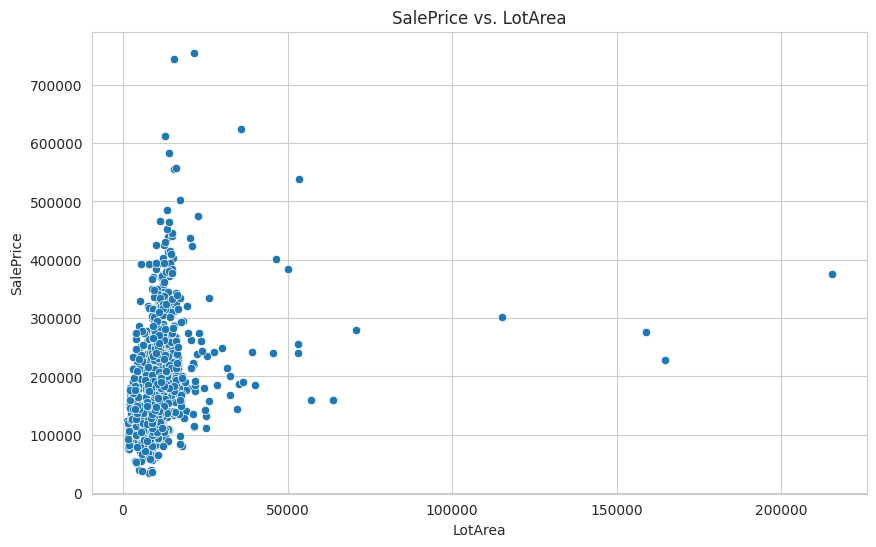

Correlación entre SalePrice y LotArea: 0.2638433538714057


In [21]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('SalePrice vs. LotArea')
plt.show()

correl2 = df['SalePrice'].corr(df['LotArea'])
print(f"Correlación entre SalePrice y LotArea: {correl2}")

A partir del análisis de dispersión y la correlación numérica entre las variables, se evidencia que GrLivArea (área habitable por encima del nivel del suelo) guarda una relación mucho más fuerte con el precio de venta (SalePrice) que LotArea (tamaño total del lote). La correlación entre SalePrice y GrLivArea es aproximadamente 0.71, mientras que con LotArea es cercana a 0.26.

Este resultado es coherente con la dinámica del mercado inmobiliario, donde el espacio interior habitable aporta generalmente más valor a la vivienda que la extensión del terreno en sí misma. En otras palabras, los compradores suelen valorar más los metros cuadrados utilizables dentro del hogar que el espacio exterior adicional, pues se traduce en una mayor funcionalidad y comodidad. Asimismo, las casas con lotes extremadamente grandes no siempre muestran precios proporcionalmente más altos, lo que reduce la correlación global entre LotArea y SalePrice.


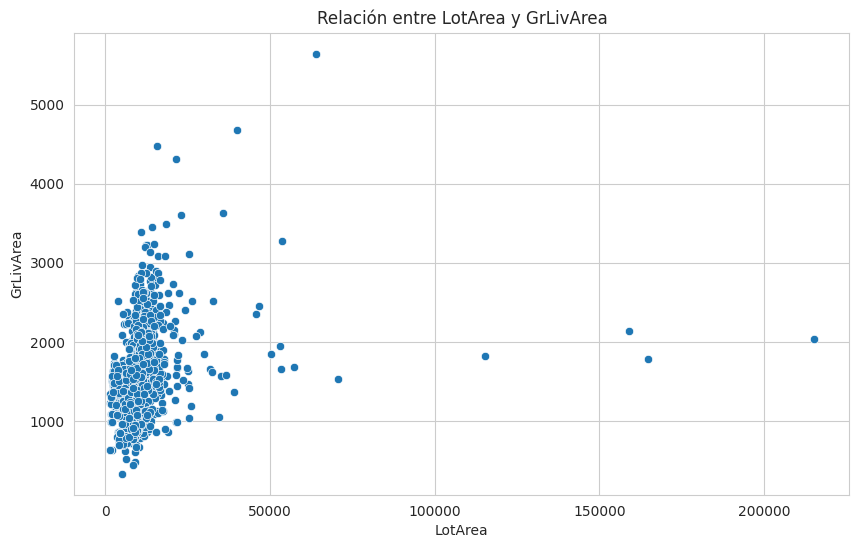

Correlación entre LotArea y GrLivArea: 0.26311616716714814


In [22]:
# Gráfico de dispersión
sns.scatterplot(x='LotArea', y='GrLivArea', data=df)
plt.title('Relación entre LotArea y GrLivArea')
plt.show()

# Cálculo de la correlación
corr_value = df['LotArea'].corr(df['GrLivArea'])
print("Correlación entre LotArea y GrLivArea:", corr_value)

 No hay relación entre el tamaño del lote y el tamaño de la área habitable por encima del nivel del suelo

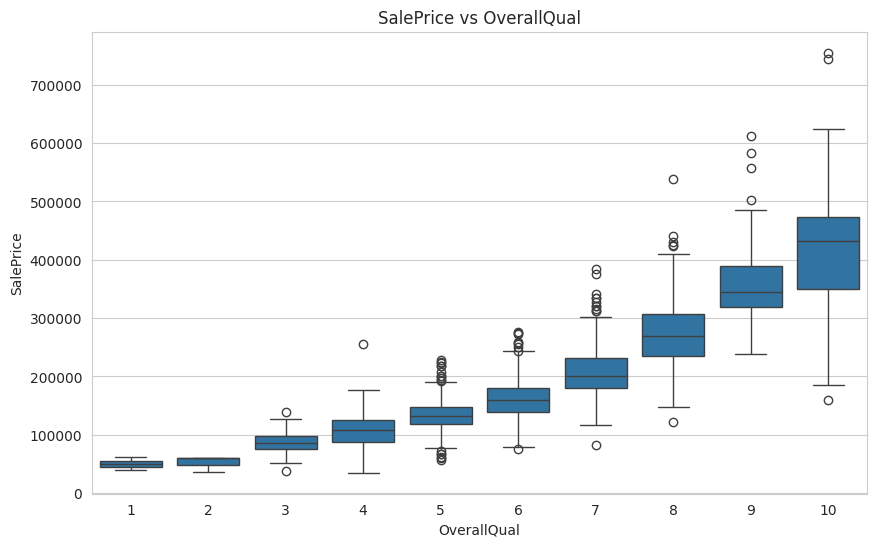

Correlación OverallQual - SalePrice: 0.7909816005838044


In [28]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs OverallQual')
plt.show()

cor_oq_sp = df['OverallQual'].corr(df['SalePrice'])
print("Correlación OverallQual - SalePrice:", cor_oq_sp)



Hay una relación entre el precio de venta y la calidad de la vivienda. 

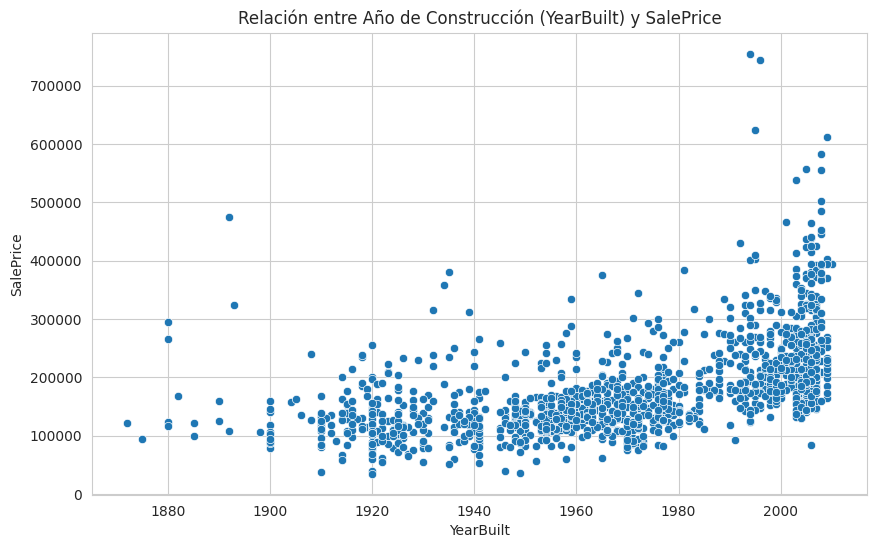

Correlación entre YearBuilt y SalePrice: 0.5228973328794969


In [29]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Relación entre Año de Construcción (YearBuilt) y SalePrice')
plt.show()

# (Opcional) Calcular correlación
corr_yearbuilt = df['YearBuilt'].corr(df['SalePrice'])
print("Correlación entre YearBuilt y SalePrice:", corr_yearbuilt)

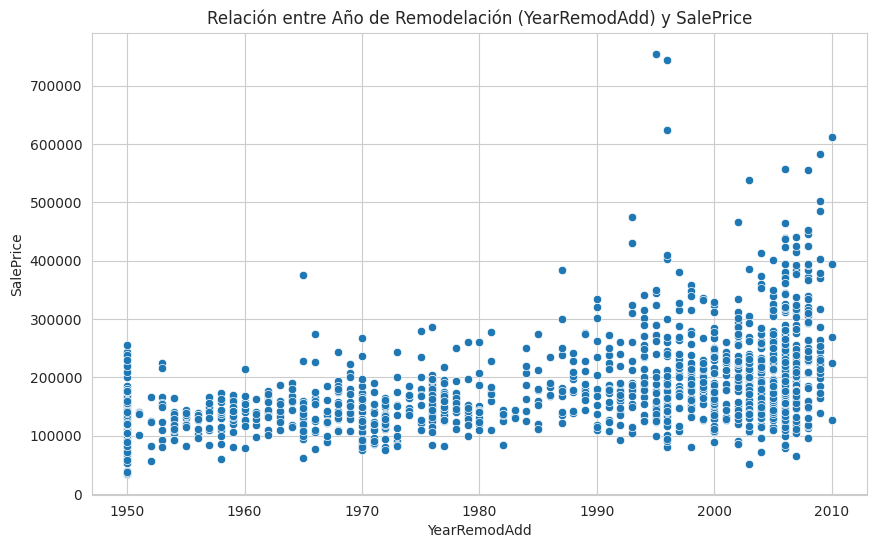

Correlación entre YearRemodAdd y SalePrice: 0.5071009671113865


In [32]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df)
plt.title('Relación entre Año de Remodelación (YearRemodAdd) y SalePrice')
plt.show()

corr_yearremod = df['YearRemodAdd'].corr(df['SalePrice'])
print("Correlación entre YearRemodAdd y SalePrice:", corr_yearremod)


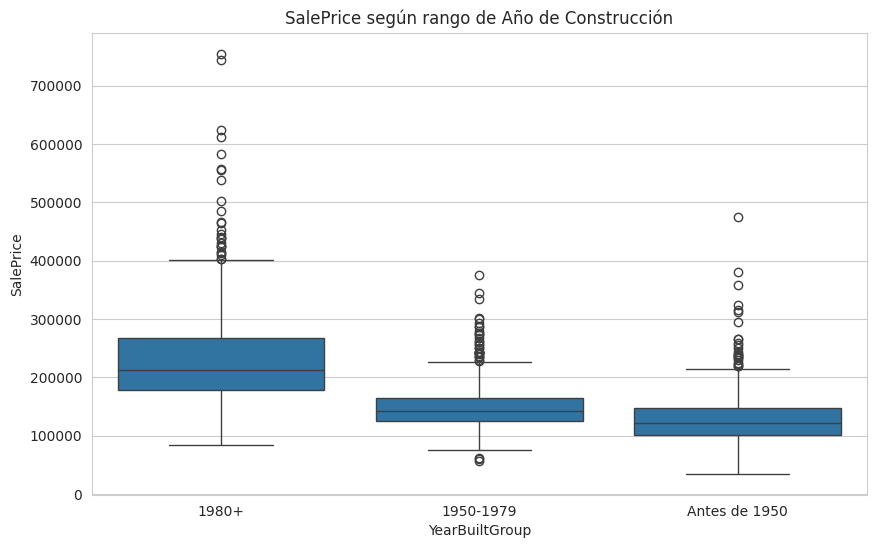

In [33]:
def categorize_year_built(year):
    if year < 1950:
        return 'Antes de 1950'
    elif year < 1980:
        return '1950-1979'
    else:
        return '1980+'

df['YearBuiltGroup'] = df['YearBuilt'].apply(categorize_year_built)

sns.boxplot(x='YearBuiltGroup', y='SalePrice', data=df)
plt.title('SalePrice según rango de Año de Construcción')
plt.show()

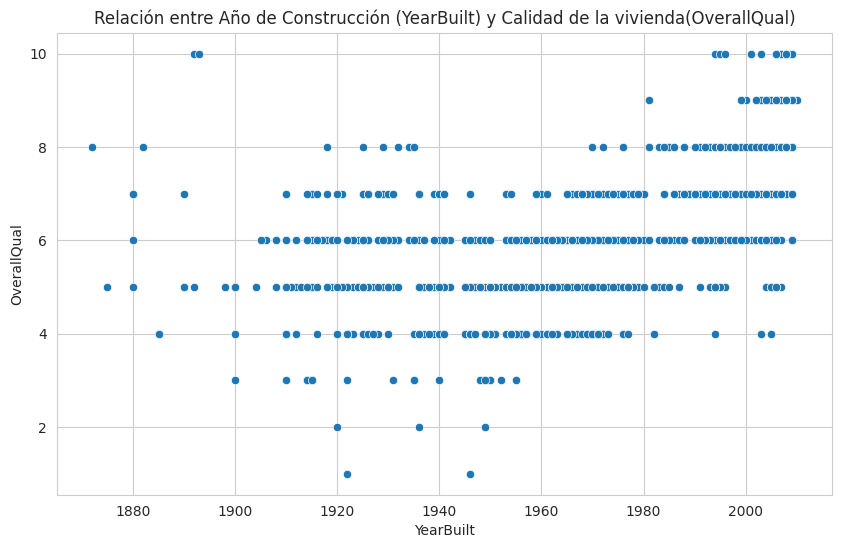

Correlación entre YearBuilt y OverallQual: 0.5723227689623612


In [36]:
sns.scatterplot(x='YearBuilt', y='OverallQual', data=df)
plt.title('Relación entre Año de Construcción (YearBuilt) y Calidad de la vivienda(OverallQual)')
plt.show()

corr_yearbuilt = df['YearBuilt'].corr(df['OverallQual'])
print("Correlación entre YearBuilt y OverallQual:", corr_yearbuilt)


Las casas construidas o remodeladas más recientemente tienden a mostrar precios de venta más elevados y, además, una calidad global (OverallQual) mayor.

La correlación entre YearBuilt y SalePrice (~0.52) indica una relación moderadamente positiva: las viviendas más nuevas suelen ser más costosas.

La correlación de YearRemodAdd (~0.51) confirma que una remodelación reciente también puede incrementar el valor de la propiedad.

Por su parte, la correlación YearBuilt–OverallQual (~0.57) sugiere que las construcciones más modernas tienden a tener mejor calidad según la escala de calificación, lo que contribuye a elevar su precio final.

In [38]:
qual_map = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    np.nan: 0 # En caso de que haya NAs, asignar 0
}

df['KitchenQual_num'] = df['KitchenQual'].map(qual_map)
df['BsmtQual_num'] = df['BsmtQual'].map(qual_map)
df['FireplaceQu_num'] = df['FireplaceQu'].map(qual_map)
df['ExterQual_num'] = df['ExterQual'].map(qual_map)


df[['KitchenQual', 'KitchenQual_num']].head(10)


,KitchenQual,KitchenQual_num
0,Gd,4
1,TA,3
2,Gd,4
3,Gd,4
4,Gd,4
5,TA,3
6,Gd,4
7,TA,3
8,TA,3
9,TA,3


In [39]:
calidad_cols = ['KitchenQual_num','BsmtQual_num','FireplaceQu_num','ExterQual_num']

for col in calidad_cols:
    corr_value = df[col].corr(df['SalePrice'])
    print(f"Correlación entre {col} y SalePrice: {corr_value:.3f}")


Correlación entre KitchenQual_num y SalePrice: 0.660
Correlación entre BsmtQual_num y SalePrice: 0.585
Correlación entre FireplaceQu_num y SalePrice: 0.520
Correlación entre ExterQual_num y SalePrice: 0.683


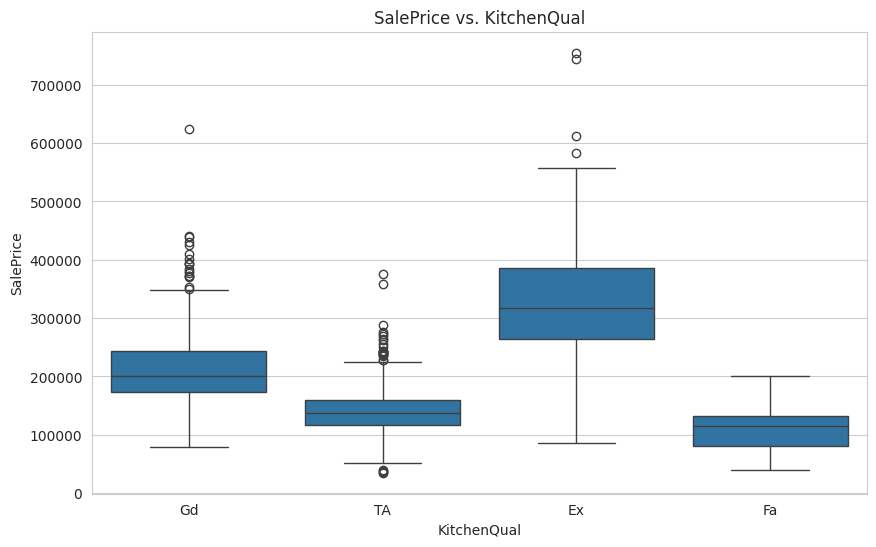

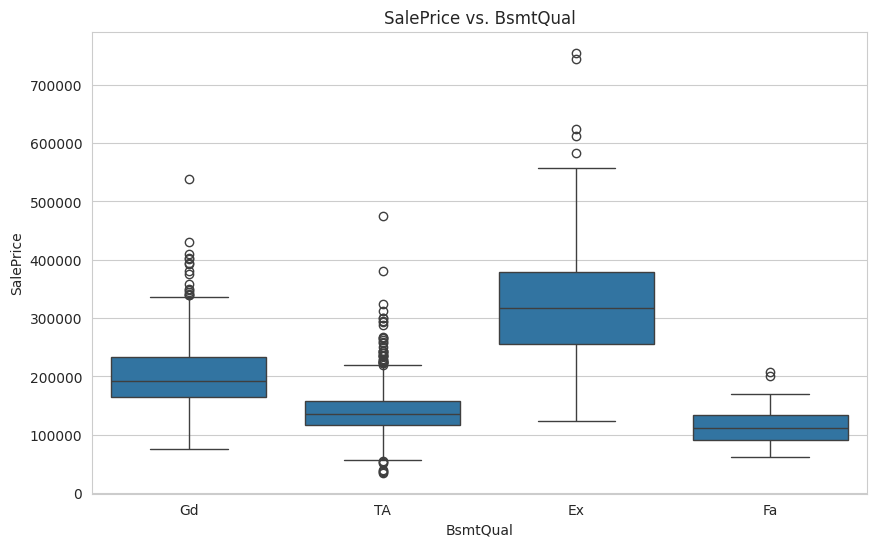

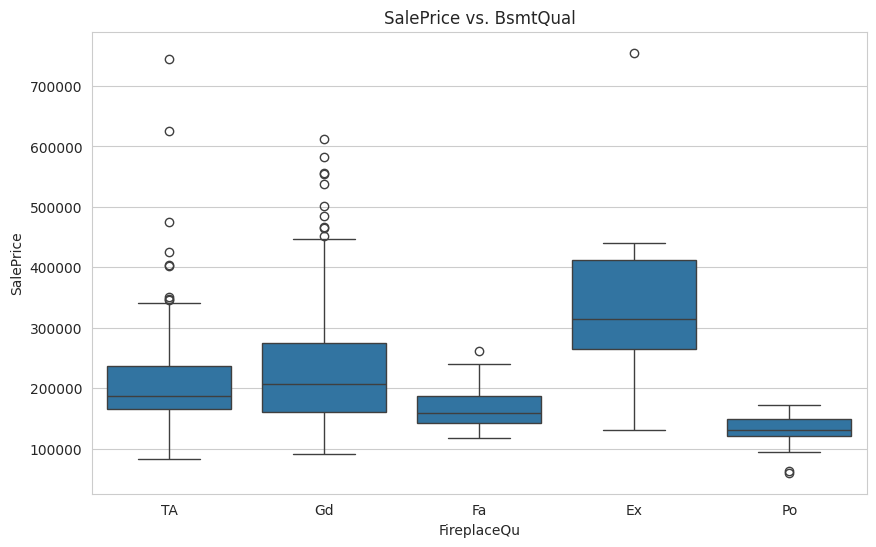

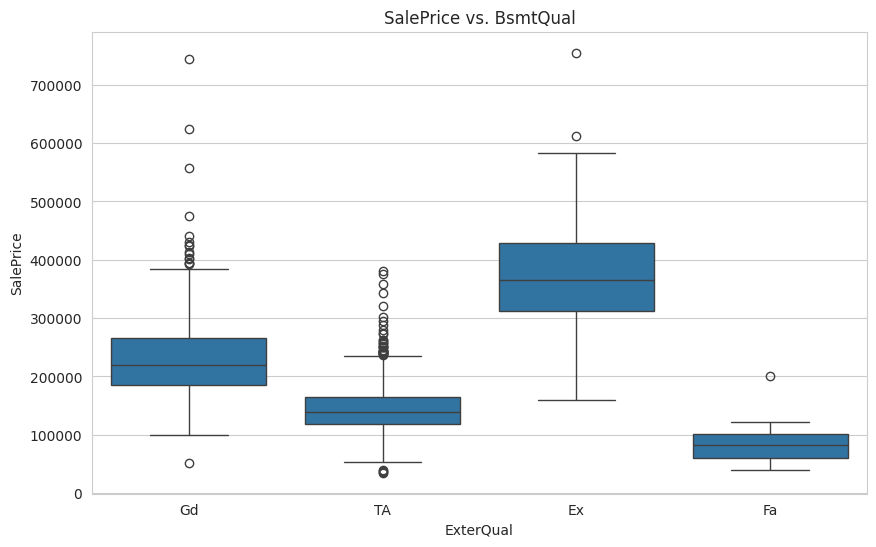

In [40]:
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.title('SalePrice vs. KitchenQual')
plt.show()

sns.boxplot(x='BsmtQual', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()

sns.boxplot(x='FireplaceQu', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()

sns.boxplot(x='ExterQual', y='SalePrice', data=df)
plt.title('SalePrice vs. BsmtQual')
plt.show()



Los resultados muestran que todas las variables de calidad interior (y exterior, en el caso de ExterQual) están fuertemente asociadas con el precio de venta. En particular, la calidad exterior (ExterQual_num) exhibe la correlación más alta (0.683), seguida de la calidad de la cocina (KitchenQual_num, 0.660). También se aprecia una relación significativa con la calidad del sótano (BsmtQual_num, 0.585) y la calidad de la chimenea (FireplaceQu_num, 0.520). Estos hallazgos confirman que las mejoras y acabados tanto en el exterior como en el interior de la vivienda tienen un impacto notable en el valor final de la propiedad.